step 1 :Import the necessary libraries

In [12]:
pip install boto3

Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install sagemaker

Note: you may need to restart the kernel to use updated packages.


In [1]:
import io
import os
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import warnings
warnings.simplefilter('ignore')
import seaborn as sns

import boto3
import sagemaker
from sagemaker import get_execution_role

sagemaker.config INFO - Not applying SDK defaults from location: C:\ProgramData\sagemaker\sagemaker\config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: C:\Users\kamal\AppData\Local\sagemaker\sagemaker\config.yaml


In [3]:
ct_data = pd.read_csv(r'C:\Users\kamal\Downloads\credit-approval_csv - pandas.csv')
ct_data.head
ct_data

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260.0,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200.0,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200.0,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280.0,750,-


In [4]:
ct_data.describe()

,Age,Debt,YearsEmployed,CreditScore,ZipCode,Income
count,678.000000,690.000000,690.000000,690.00000,677.000000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,184.014771,1017.385507
std,11.957862,4.978163,3.346513,4.86294,173.806768,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,22.602500,1.000000,0.165000,0.00000,75.000000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,160.000000,5.000000
75%,38.230000,7.207500,2.625000,3.00000,276.000000,395.500000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100000.000000


In [5]:
ct_data.replace('?', np.NaN, inplace = True)
# Convert Age to numeric
ct_data["Age"] = pd.to_numeric(ct_data["Age"])

In [7]:
def imputeWithMode(df):
    """ 
    Going through each columns and checking the type is object
    if it is object, impute it with most frequent value
    """
    for col in df:
        if df[col].dtypes == 'object':
            df[col] = df[col].fillna(df[col].mode().iloc[0])
imputeWithMode(ct_data)

In [9]:
ct_data_drop=ct_data

In [10]:
ct_data_drop=ct_data.drop(["ZipCode"],axis=1)
ct_data_drop=ct_data_drop.drop(["DriversLicense"],axis=1)

In [11]:
ct_data_drop

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,Citizen,Income,Approved
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,g,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,g,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,g,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,g,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,s,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,g,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,g,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,g,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,g,750,-


In [12]:
ct_data.describe

<bound method NDFrame.describe of     Gender    Age    Debt Married BankCustomer EducationLevel Ethnicity  \
0        b  30.83   0.000       u            g              w         v   
1        a  58.67   4.460       u            g              q         h   
2        a  24.50   0.500       u            g              q         h   
3        b  27.83   1.540       u            g              w         v   
4        b  20.17   5.625       u            g              w         v   
..     ...    ...     ...     ...          ...            ...       ...   
685      b  21.08  10.085       y            p              e         h   
686      a  22.67   0.750       u            g              c         v   
687      a  25.25  13.500       y            p             ff        ff   
688      b  17.92   0.205       u            g             aa         v   
689      b  35.00   3.375       u            g              c         h   

     YearsEmployed PriorDefault Employed  CreditScore DriversLice

In [13]:
ct_data_drop.describe

<bound method NDFrame.describe of     Gender    Age    Debt Married BankCustomer EducationLevel Ethnicity  \
0        b  30.83   0.000       u            g              w         v   
1        a  58.67   4.460       u            g              q         h   
2        a  24.50   0.500       u            g              q         h   
3        b  27.83   1.540       u            g              w         v   
4        b  20.17   5.625       u            g              w         v   
..     ...    ...     ...     ...          ...            ...       ...   
685      b  21.08  10.085       y            p              e         h   
686      a  22.67   0.750       u            g              c         v   
687      a  25.25  13.500       y            p             ff        ff   
688      b  17.92   0.205       u            g             aa         v   
689      b  35.00   3.375       u            g              c         h   

     YearsEmployed PriorDefault Employed  CreditScore Citizen  In

In [14]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
Lable = LabelEncoder()
#Looping for each object type column
#Using label encoder to convert into numeric types
for col in ct_data_drop:
    if ct_data_drop[col].dtypes=='object':
        ct_data_drop[col]=Lable.fit_transform(ct_data_drop[col])

In [15]:
ct_data_drop.describe()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,Citizen,Income,Approved
count,690.000000,678.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000
mean,0.695652,31.568171,4.758725,1.233333,0.475362,5.698551,5.098551,2.223406,0.523188,0.427536,2.40000,0.176812,1017.385507,0.555072
std,0.460464,11.957862,4.978163,0.430063,0.850238,4.285748,2.510731,3.346513,0.499824,0.495080,4.86294,0.557869,5210.102598,0.497318
min,0.000000,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,22.602500,1.000000,1.000000,0.000000,1.000000,3.000000,0.165000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,1.000000,28.460000,2.750000,1.000000,0.000000,5.000000,7.000000,1.000000,1.000000,0.000000,0.00000,0.000000,5.000000,1.000000
75%,1.000000,38.230000,7.207500,1.000000,0.000000,10.000000,7.000000,2.625000,1.000000,1.000000,3.00000,0.000000,395.500000,1.000000
max,1.000000,80.250000,28.000000,2.000000,2.000000,13.000000,8.000000,28.500000,1.000000,1.000000,67.00000,2.000000,100000.000000,1.000000


In [16]:
ct_data_drop.head(20)

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,Citizen,Income,Approved
0,1,30.83,0.000,1,0,12,7,1.250,1,1,1,0,0,0
1,0,58.67,4.460,1,0,10,3,3.040,1,1,6,0,560,0
2,0,24.50,0.500,1,0,10,3,1.500,1,0,0,0,824,0
3,1,27.83,1.540,1,0,12,7,3.750,1,1,5,0,3,0
4,1,20.17,5.625,1,0,12,7,1.710,1,0,0,2,0,0
5,1,32.08,4.000,1,0,9,7,2.500,1,0,0,0,0,0
6,1,33.17,1.040,1,0,11,3,6.500,1,0,0,0,31285,0
7,0,22.92,11.585,1,0,2,7,0.040,1,0,0,0,1349,0
8,1,54.42,0.500,2,2,8,3,3.960,1,0,0,0,314,0
9,1,42.50,4.915,2,2,12,7,3.165,1,0,0,0,1442,0


In [17]:
def approval_percentage(ct_data_drop):
    #Calculate the fraction of all data points that have a 'Class' label of 1; approved.
    #param transaction_df: Dataframe of all transaction data points; has a column 'Approve'
    #reurn: A fractional percentage of fraudulent data points/all points
    
    # counts for all classes
    counts = ct_data_drop['Approved'].value_counts()
    
    # get approval and noapproval cnts
    approval_cnts = counts[1]
    noapproval_cnts = counts[0]
    
    # calculate percentage of approved data
    approval_percentage = approval_cnts/(approval_cnts+noapproval_cnts)
    
    return approval_percentage

# call the function to calculate the approval percentage
approval_percentage = approval_percentage(ct_data_drop)

print('Approval percentage = ', approval_percentage)
print('Total # of approved pts: ', approval_percentage*ct_data_drop.shape[0])
print('Out of (total) pts: ', ct_data_drop.shape[0])

Approval percentage =  0.5550724637681159
Total # of approved pts:  383.0
Out of (total) pts:  690


In [18]:
#convert to categorical data to dummy data
ct_data_dummies = pd.get_dummies(ct_data_drop, columns=[ "Married","EducationLevel", "Citizen", "Ethnicity"])
ct_data_dummies.head()

,Gender,Age,Debt,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,Income,Approved,...,Citizen_2,Ethnicity_0,Ethnicity_1,Ethnicity_2,Ethnicity_3,Ethnicity_4,Ethnicity_5,Ethnicity_6,Ethnicity_7,Ethnicity_8
0,1,30.83,0.000,0,1.25,1,1,1,0,0,...,False,False,False,False,False,False,False,False,True,False
1,0,58.67,4.460,0,3.04,1,1,6,560,0,...,False,False,False,False,True,False,False,False,False,False
2,0,24.50,0.500,0,1.50,1,0,0,824,0,...,False,False,False,False,True,False,False,False,False,False
3,1,27.83,1.540,0,3.75,1,1,5,3,0,...,False,False,False,False,False,False,False,False,True,False
4,1,20.17,5.625,0,1.71,1,0,0,0,0,...,True,False,False,False,False,False,False,False,True,False


In [19]:
ct_data_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             690 non-null    int32  
 1   Age                678 non-null    float64
 2   Debt               690 non-null    float64
 3   BankCustomer       690 non-null    int32  
 4   YearsEmployed      690 non-null    float64
 5   PriorDefault       690 non-null    int32  
 6   Employed           690 non-null    int32  
 7   CreditScore        690 non-null    int64  
 8   Income             690 non-null    int64  
 9   Approved           690 non-null    int32  
 10  Married_0          690 non-null    bool   
 11  Married_1          690 non-null    bool   
 12  Married_2          690 non-null    bool   
 13  EducationLevel_0   690 non-null    bool   
 14  EducationLevel_1   690 non-null    bool   
 15  EducationLevel_2   690 non-null    bool   
 16  EducationLevel_3   690 non

In [20]:
ct_data_dummies.head()

,Gender,Age,Debt,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,Income,Approved,...,Citizen_2,Ethnicity_0,Ethnicity_1,Ethnicity_2,Ethnicity_3,Ethnicity_4,Ethnicity_5,Ethnicity_6,Ethnicity_7,Ethnicity_8
0,1,30.83,0.000,0,1.25,1,1,1,0,0,...,False,False,False,False,False,False,False,False,True,False
1,0,58.67,4.460,0,3.04,1,1,6,560,0,...,False,False,False,False,True,False,False,False,False,False
2,0,24.50,0.500,0,1.50,1,0,0,824,0,...,False,False,False,False,True,False,False,False,False,False
3,1,27.83,1.540,0,3.75,1,1,5,3,0,...,False,False,False,False,False,False,False,False,True,False
4,1,20.17,5.625,0,1.71,1,0,0,0,0,...,True,False,False,False,False,False,False,False,True,False


In [21]:
ct_data_dummies.describe()

,Gender,Age,Debt,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,Income,Approved
count,690.000000,678.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000
mean,0.695652,31.568171,4.758725,0.475362,2.223406,0.523188,0.427536,2.40000,1017.385507,0.555072
std,0.460464,11.957862,4.978163,0.850238,3.346513,0.499824,0.495080,4.86294,5210.102598,0.497318
min,0.000000,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,22.602500,1.000000,0.000000,0.165000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,1.000000,28.460000,2.750000,0.000000,1.000000,1.000000,0.000000,0.00000,5.000000,1.000000
75%,1.000000,38.230000,7.207500,0.000000,2.625000,1.000000,1.000000,3.00000,395.500000,1.000000
max,1.000000,80.250000,28.000000,2.000000,28.500000,1.000000,1.000000,67.00000,100000.000000,1.000000


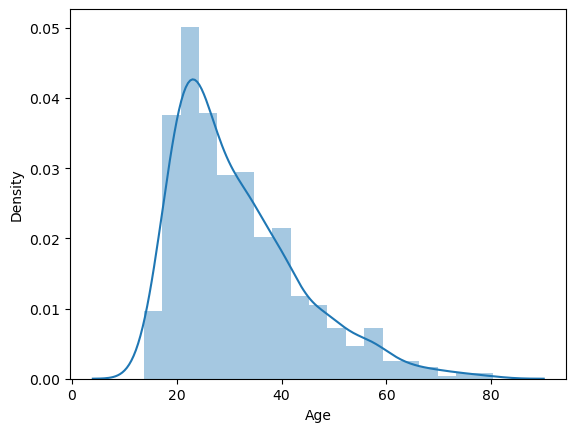

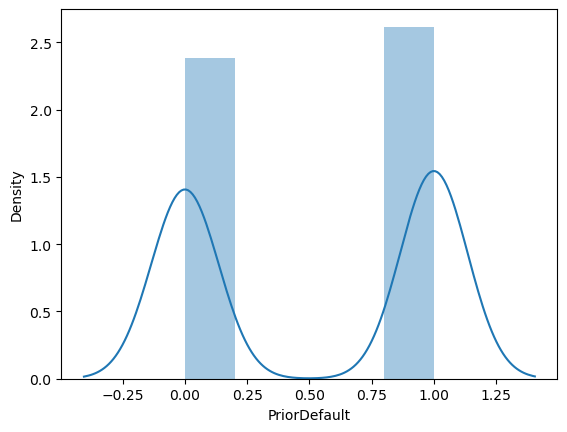

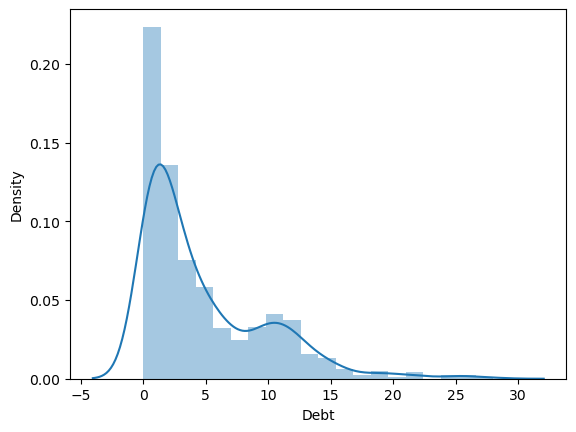

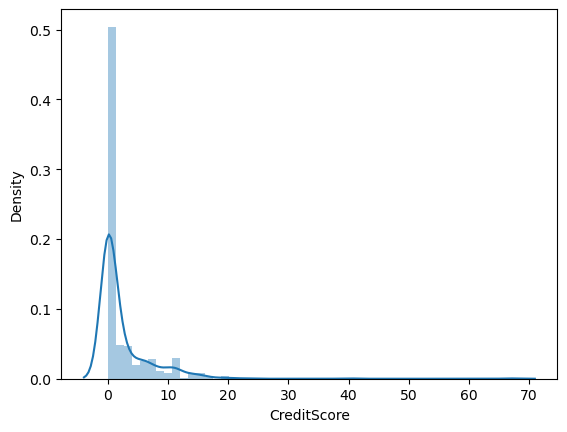

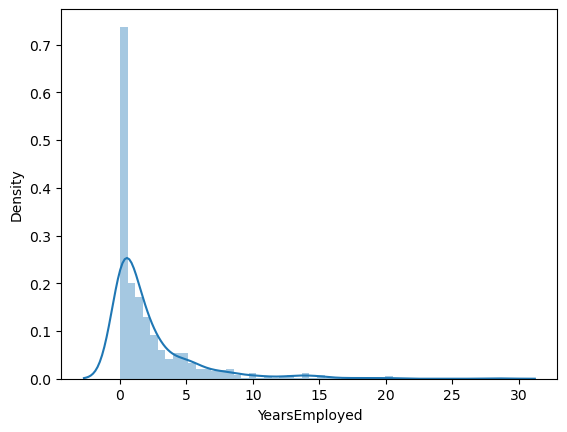

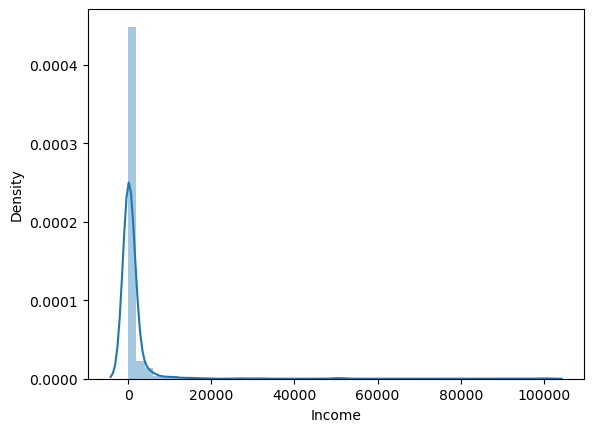

<Figure size 640x480 with 0 Axes>

In [22]:
def plotDistPlot(col):
    """Flexibly plot a univariate distribution of observation"""
    try:
        sns.distplot(col)
    except RuntimeError as re:
        if str(re).startswith("Selected KDE bandwidth is 0. Cannot estimate density."):
            sns.distplot(col, kde_kws={'bw': 1.5})
        else:
            raise re
    plt.show()
    
plotDistPlot(ct_data_drop['Age'])
plotDistPlot(ct_data_drop['PriorDefault'])
plotDistPlot(ct_data_drop['Debt'])
plotDistPlot(ct_data_drop['CreditScore'])
plotDistPlot(ct_data_drop['YearsEmployed'])
plotDistPlot(ct_data_drop['Income'])
plt.savefig('Distribution.jpeg')

<Axes: xlabel='BankCustomer', ylabel='Density'>

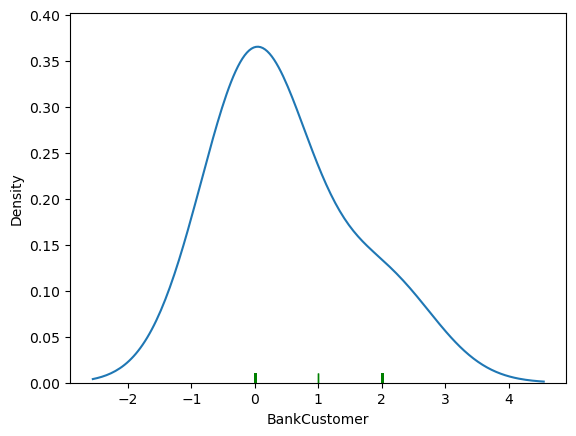

In [23]:
sns.distplot(ct_data_drop['BankCustomer'], hist = False, rug = True, rug_kws = {'color' : 'g'}, kde_kws = {'bw' : 1})

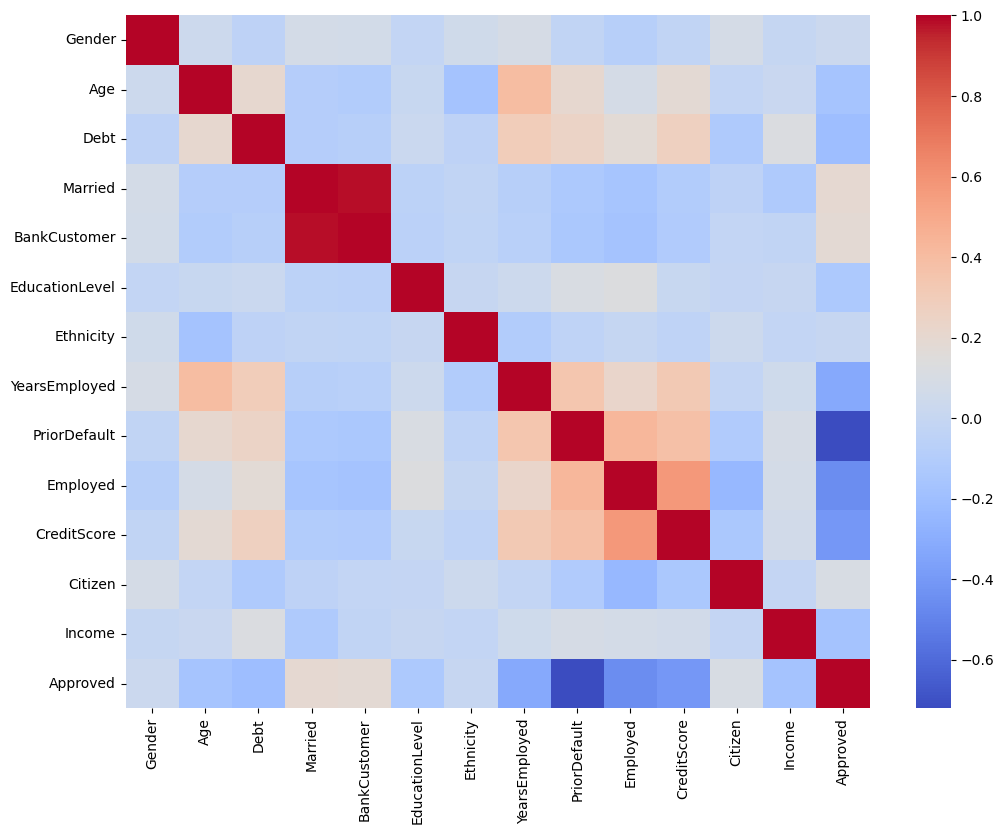

In [24]:
corr = ct_data_drop.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap='coolwarm')
plt.savefig('corelation.jpg')

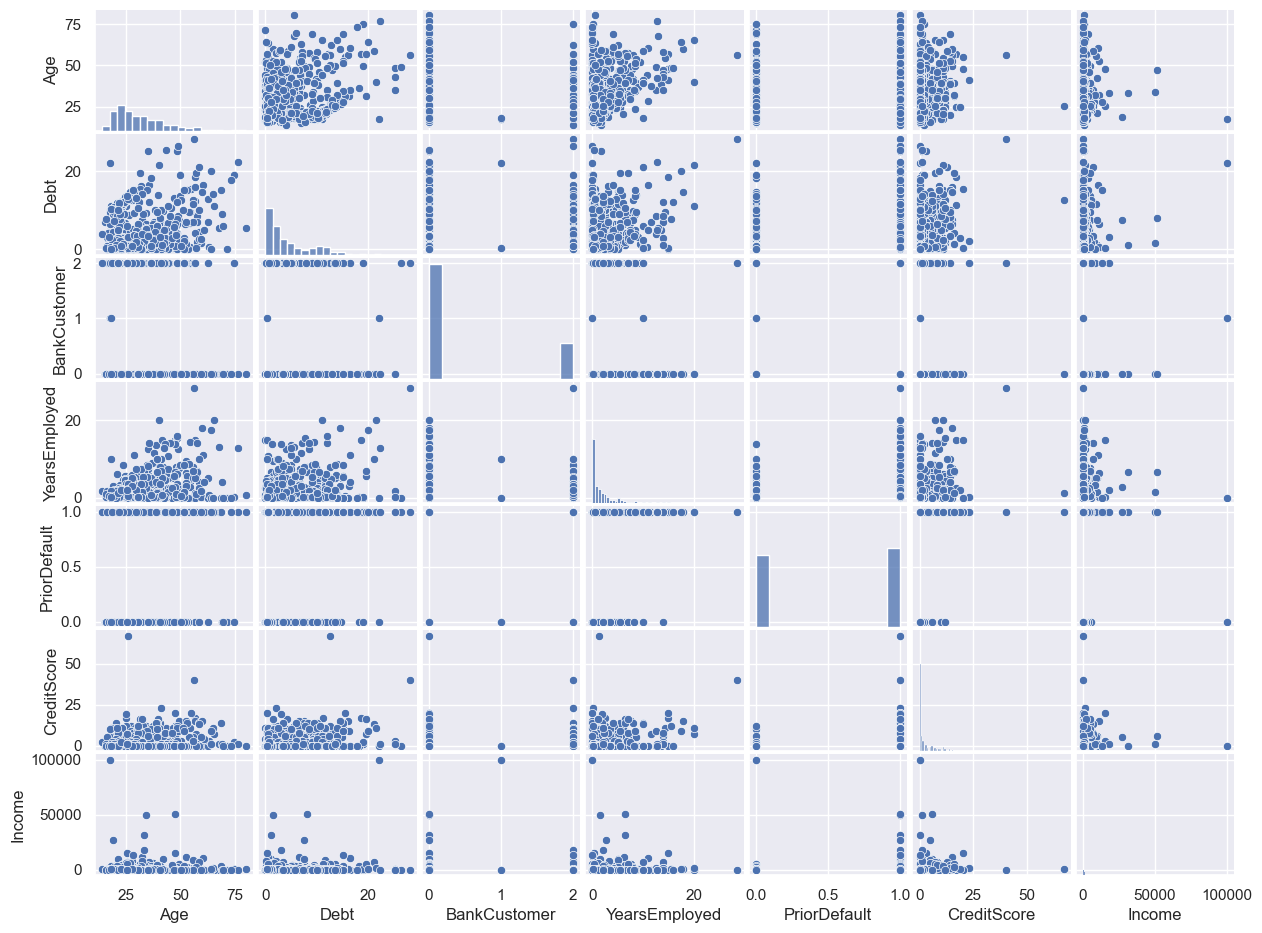

In [25]:
sns.set()
cols = ['Age', 'Debt', 'BankCustomer', 'YearsEmployed', 'PriorDefault', 'CreditScore', 'Income']

# Create the pairplot with a specific size
g = sns.pairplot(ct_data_drop[cols], height=5)

# Save the plot as an image with the specified size
g.fig.set_size_inches(12, 9)
plt.savefig('scatterplot.jpg', dpi=300)  

# Display the plot
plt.show()

In [27]:
from sklearn.model_selection import train_test_split
ct_data_drop_copy = ct_data_drop
ct_data_drop_copy

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,Citizen,Income,Approved
0,1,30.83,0.000,1,0,12,7,1.25,1,1,1,0,0,0
1,0,58.67,4.460,1,0,10,3,3.04,1,1,6,0,560,0
2,0,24.50,0.500,1,0,10,3,1.50,1,0,0,0,824,0
3,1,27.83,1.540,1,0,12,7,3.75,1,1,5,0,3,0
4,1,20.17,5.625,1,0,12,7,1.71,1,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,21.08,10.085,2,2,4,3,1.25,0,0,0,0,0,1
686,0,22.67,0.750,1,0,1,7,2.00,0,1,2,0,394,1
687,0,25.25,13.500,2,2,5,2,2.00,0,1,1,0,1,1
688,1,17.92,0.205,1,0,0,7,0.04,0,0,0,0,750,1


In [28]:
ct_data_drop_copy = ct_data_drop_copy.values
X,y = ct_data_drop_copy[:,0:13] , ct_data_drop_copy[:,13]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                y,
                                test_size=0.2,
                                random_state=42)

In [29]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler


# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.fit_transform(X_test)

In [30]:
traindf = pd.DataFrame({'Label': y_train, 'Column1': rescaledX_train[:, 0], 'Column2': rescaledX_train[:, 1],'Column3': rescaledX_train[:, 2],'Column4': rescaledX_train[:, 3],'Column5': rescaledX_train[:, 4],'Column6': rescaledX_train[:, 5],'Column7': rescaledX_train[:, 6],'Column8': rescaledX_train[:, 7], 'Column9': rescaledX_train[:, 8], 'Column10': rescaledX_train[:, 9],'Column11': rescaledX_train[:, 10],'Column12': rescaledX_train[:, 11],'Column13': rescaledX_train[:, 12]})
traindf.head(25)

,Label,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13
0,1.0,1.0,0.162857,0.512626,1.0,1.0,0.384615,0.250,0.00000,0.0,0.0,0.000000,0.0,0.00000
1,1.0,1.0,0.231880,0.132903,0.5,0.0,0.923077,0.875,0.17500,1.0,1.0,0.044776,0.0,0.00000
2,1.0,1.0,0.392180,0.018986,0.5,0.0,0.692308,0.875,0.01250,1.0,0.0,0.000000,1.0,0.00000
3,0.0,1.0,0.184211,0.037972,0.5,0.0,0.769231,0.875,0.08750,1.0,0.0,0.000000,0.0,0.00000
4,0.0,1.0,0.604060,0.365483,0.5,0.0,0.307692,0.875,0.43325,1.0,1.0,0.074627,0.0,0.00000
5,0.0,1.0,0.315789,0.569584,0.5,0.0,0.846154,0.625,0.26875,1.0,1.0,0.134328,0.0,0.00134
6,1.0,1.0,0.041353,0.004747,0.5,0.0,0.076923,0.875,0.00825,0.0,0.0,0.000000,0.0,0.00000
7,1.0,1.0,0.175489,0.020505,0.5,0.0,0.923077,0.875,0.00825,0.0,1.0,0.014925,0.0,0.00444
8,1.0,1.0,0.037594,0.000000,1.0,1.0,0.000000,0.875,0.01250,0.0,0.0,0.000000,0.0,0.00000
9,1.0,1.0,0.271880,0.094931,0.5,0.0,0.000000,0.875,0.37500,1.0,0.0,0.000000,0.0,0.00000


In [31]:
testdf = pd.DataFrame({'Label': y_test, 'Column1': rescaledX_test[:, 0], 'Column2': rescaledX_test[:, 1],'Column3': rescaledX_test[:, 2],'Column4': rescaledX_test[:, 3],'Column5': rescaledX_test[:, 4],'Column6': rescaledX_test[:, 5],'Column7': rescaledX_test[:, 6],'Column8': rescaledX_test[:, 7], 'Column9': rescaledX_test[:, 8], 'Column10': rescaledX_test[:, 9],'Column11': rescaledX_test[:, 10],'Column12': rescaledX_test[:, 11],'Column13': rescaledX_test[:, 12]})
testdf.head(25)

,Label,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13
0,1.0,0.0,NaN,0.053571,0.5,0.0,0.384615,0.250,0.000000,0.0,1.0,0.050,0.0,0.002055
1,0.0,0.0,0.562791,0.142857,0.5,0.0,0.538462,0.500,0.000000,1.0,0.0,0.000,0.0,0.018787
2,1.0,1.0,0.079070,0.000000,0.5,0.0,0.230769,0.875,0.017544,0.0,0.0,0.000,0.0,0.000000
3,1.0,1.0,0.587535,0.232143,0.5,0.0,0.076923,0.875,0.035088,0.0,0.0,0.000,0.0,0.004462
4,0.0,1.0,0.063628,0.000000,1.0,1.0,0.692308,0.000,0.000000,0.0,0.0,0.000,1.0,0.000020
5,0.0,1.0,0.159628,0.236607,1.0,1.0,0.230769,0.875,0.192982,1.0,0.0,0.000,1.0,0.000000
6,1.0,1.0,0.108465,0.028214,1.0,1.0,0.153846,0.875,0.023333,0.0,0.0,0.000,0.0,0.000000
7,0.0,1.0,0.172093,0.446429,0.5,0.0,0.000000,0.875,0.105263,1.0,0.0,0.000,1.0,0.000000
8,1.0,1.0,0.114791,0.017857,0.5,0.0,0.076923,0.875,0.004386,0.0,0.0,0.000,0.0,0.000000
9,1.0,1.0,0.079070,0.394464,0.5,0.0,0.076923,0.875,0.070175,0.0,0.0,0.000,0.0,0.000000


In [32]:
os.makedirs('CreditCardApproval', exist_ok=True)
traindf.to_csv('CreditCardApproval/train.csv') 

In [33]:
os.makedirs('CreditCardApproval', exist_ok=True)
testdf.to_csv('CreditCardApproval/test.csv') 

In [35]:
ct_data.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+
